# Linear Regression
#### Name: 沈家駿
#### Student ID: 0712223

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

## Data Generation

### Generate the value of x
Need to ensure that x is not equal to low boundary.

In [2]:
stop = False
while not stop:
    x = np.random.uniform(-1.5, 1.0, size=1000)
    stop = all(x != -1.5)
# x.sort()

### Generate the value of y

In [3]:
y = 3*(x**3)+2*(x**2)-3*x+1+np.random.normal(0, 0.5, 1000)

### Plot the data

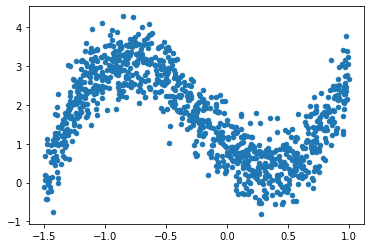

In [4]:
plt.scatter(x,y, s=20)

## Data Preprocessing
Generate degree-K polynomial features

In [5]:
# K = 1
pf1 = PolynomialFeatures(1).fit_transform(np.transpose([x]))

# K = 2
pf2 = PolynomialFeatures(2).fit_transform(np.transpose([x]))

# K = 3
pf3 = PolynomialFeatures(3).fit_transform(np.transpose([x]))

# K = 4
pf4 = PolynomialFeatures(4).fit_transform(np.transpose([x]))

## Model Construction
Construct the model of each polynomial features with different K.

In [6]:
lr1 = LinearRegression().fit(pf1, y)
lr2 = LinearRegression().fit(pf2, y)
lr3 = LinearRegression().fit(pf3, y)
lr4 = LinearRegression().fit(pf4, y)

## Results 

### Define some functions
#### PolyCoefficients
It can output the y value of a polynomial function given the x, coefficients and intercept.

In [7]:
def PolyCoefficients(x, coeffs, intercept):
    y = intercept
    for i in range(len(coeffs)):
        y += coeffs[i]*x**i
    return y

#### gen_lable
It can generate the legend lable.

In [8]:
def gen_lable(coef, intercept):
# coef = lr2.coef_
# intercept = lr2.intercept_
    lable = r''
    if lr2.intercept_ != 0:
        lable += r"{:.2f}".format(intercept)
    for i, c in enumerate(coef[1:]):
        if c > 0:
            lable += r"+{:.2f}".format(c)
        elif c < 0:
            lable += r"{:.2f}".format(c)
        if i == 0:
            lable += r' \times x_i'
        else:
            lable += r' \times {x_i}^'+str(i+1)+' '

    lable = r'$'+lable.strip()+r'$'
    
    # "{:.2f}".format(lr1.coef_[1])
    return lable

## Show the results in a single figure

Text(0, 0.5, 'y')

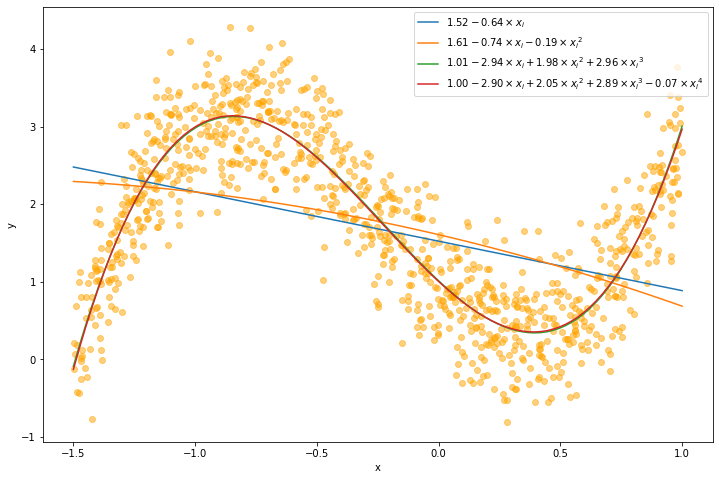

In [9]:
plt.figure(figsize=(12, 8))
plt.scatter(x, y, c="orange", alpha=0.5)
x_ = np.linspace(-1.5, 1, 100)
plt.plot(x_, PolyCoefficients(x_, lr1.coef_, lr1.intercept_), label=gen_lable(lr1.coef_, lr1.intercept_))
plt.plot(x_, PolyCoefficients(x_, lr2.coef_, lr2.intercept_), label=gen_lable(lr2.coef_, lr2.intercept_))
plt.plot(x_, PolyCoefficients(x_, lr3.coef_, lr3.intercept_), label=gen_lable(lr3.coef_, lr3.intercept_))
plt.plot(x_, PolyCoefficients(x_, lr4.coef_, lr4.intercept_), label=gen_lable(lr4.coef_, lr4.intercept_))
plt.legend()
plt.xlabel('x')
plt.ylabel('y')